In [8]:
import seaborn as sns
import pandas as pd
# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 63.0+ KB


In [3]:
df['deck'].value_counts(dropna=False) 

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [4]:
df.isnull().sum(axis = 0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

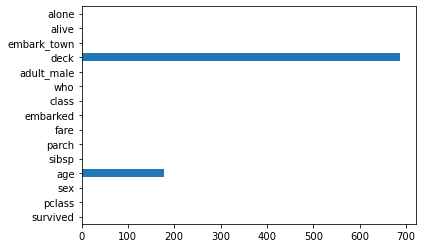

In [5]:
df2 = df.isnull().sum(axis = 0)
df2.plot.barh()

<AxesSubplot:>

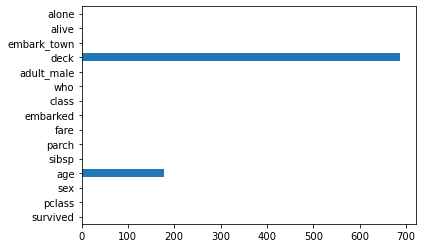

In [6]:
df2.plot(kind='barh')

In [9]:
data = pd.DataFrame({"name":['Alfred','Batman','Catwoman'],
                    "toy":[None, 'Batmobile','Bullwhip'],
                    "born":[None, "1940-04-25",None]})
data

,name,toy,born
0,Alfred,None,None
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,None


In [11]:
data.isnull()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True


In [12]:
data.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [13]:
data.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


In [14]:
data.dropna(how = 'all')

,name,toy,born
0,Alfred,None,None
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,None


In [17]:
data.dropna(thresh = 2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,None


In [18]:
data.dropna(subset = ['name','toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,None


In [19]:
data.dropna(inplace = True)

In [20]:
data

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [21]:
df_thresh = df.dropna(axis=1, thresh=500)  
df_thresh.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [22]:
df_age = df.dropna(subset=['age'], how='any', axis=0)  
len(df_age)

714

In [23]:
df.isnull().sum(axis=0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
null_count = df.isnull().sum(axis=0)

In [25]:
df_null_count = null_count.reset_index()
df_null_count 

,index,0
0,survived,0
1,pclass,0
2,sex,0
3,age,177
4,sibsp,0
5,parch,0
6,fare,0
7,embarked,2
8,class,0
9,who,0


In [26]:
df_null_count.columns = ['컬럼명','결측치수']
df_null_count.head()

,컬럼명,결측치수
0,survived,0
1,pclass,0
2,sex,0
3,age,177
4,sibsp,0


In [27]:
df_null_count.sort_values(by='결측치수', ascending = False).head()

,컬럼명,결측치수
11,deck,688
3,age,177
7,embarked,2
12,embark_town,2
0,survived,0


In [29]:
drop_columns = df_null_count['컬럼명'].head(4).tolist()
drop_columns

['survived', 'pclass', 'sex', 'age']

In [30]:
df2 = df.drop(drop_columns, axis =1)
df2

,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [31]:
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [32]:
mean_age = df['age'].mean(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
df['age'].fillna(mean_age, inplace=True)
print(df['age'].head(10))

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [33]:
df['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object

In [34]:
most_freq = df['embark_town'].value_counts(dropna=True).idxmax()   
most_freq

'Southampton'

In [35]:
df['embark_town'].fillna(most_freq, inplace=True)

In [36]:
df['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object

In [38]:
df['embark_town']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [39]:
df.loc[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True


In [40]:
df['embarked'].fillna(method='ffill', inplace=True)

In [41]:
df.loc[[60,61,62,828,829,830],'embarked']

60     C
61     C
62     S
828    Q
829    Q
830    C
Name: embarked, dtype: object

In [42]:
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [43]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [44]:
df.duplicated(keep='last')

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [45]:
df.duplicated(keep=False)

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [46]:
df['c2'].duplicated()

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool

In [47]:
df.duplicated(subset=['c2'])

0    False
1     True
2     True
3    False
4     True
dtype: bool

In [48]:
df.duplicated(subset=['c1','c2'])

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [49]:
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [50]:
df.drop_duplicates()

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [51]:
df.drop_duplicates(subset=['c2', 'c3'])

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


In [52]:
 df.drop_duplicates(ignore_index=True)

,c1,c2,c3
0,a,1,1
1,b,1,2
2,a,2,2
3,b,2,2


In [53]:
 df.drop_duplicates(subset=['c2'],keep='first')

,c1,c2,c3
0,a,1,1
3,a,2,2


In [54]:
 df.drop_duplicates(subset=['c2'],keep='last')

,c1,c2,c3
2,b,1,2
4,b,2,2


In [55]:
df.drop_duplicates(subset=['c2', 'c3'],keep=False)

,c1,c2,c3
2,b,1,2
